# Kinematic Report Tool

## 1) Setup


### Generate the Kinemtatic Model from a hardpoints file
Edit parameters/hardpoints.yaml, then run the code below

In [1]:
from kinematics.kinematic_model import KinematicModel
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as FuncFormatter
import numpy as np

kin_model_1 = KinematicModel()
kin_model_1.from_hardpoints('parameters/hardpoints_1.yaml')
f1 = kin_model_1.front
r1 = kin_model_1.rear

kin_model_2 = KinematicModel()
kin_model_2.from_hardpoints('parameters/hardpoints_2.yaml')
f2 = kin_model_2.front
r2 = kin_model_2.rear

IndexError: list index out of range

## 2) Graphing

### Motion Ratio

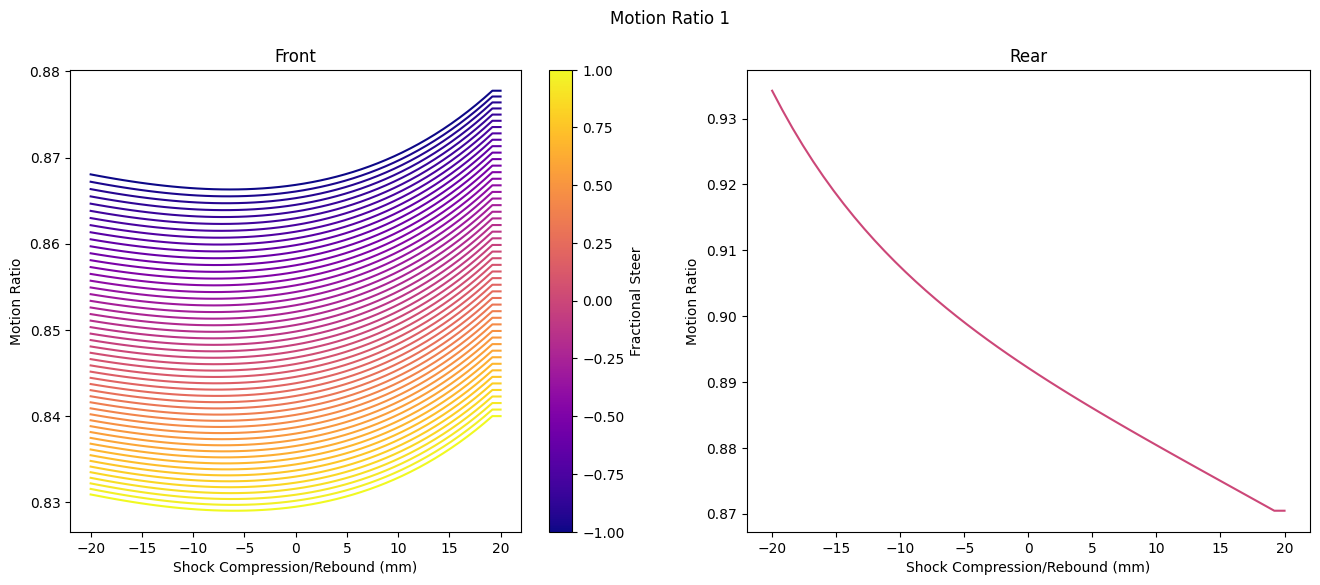

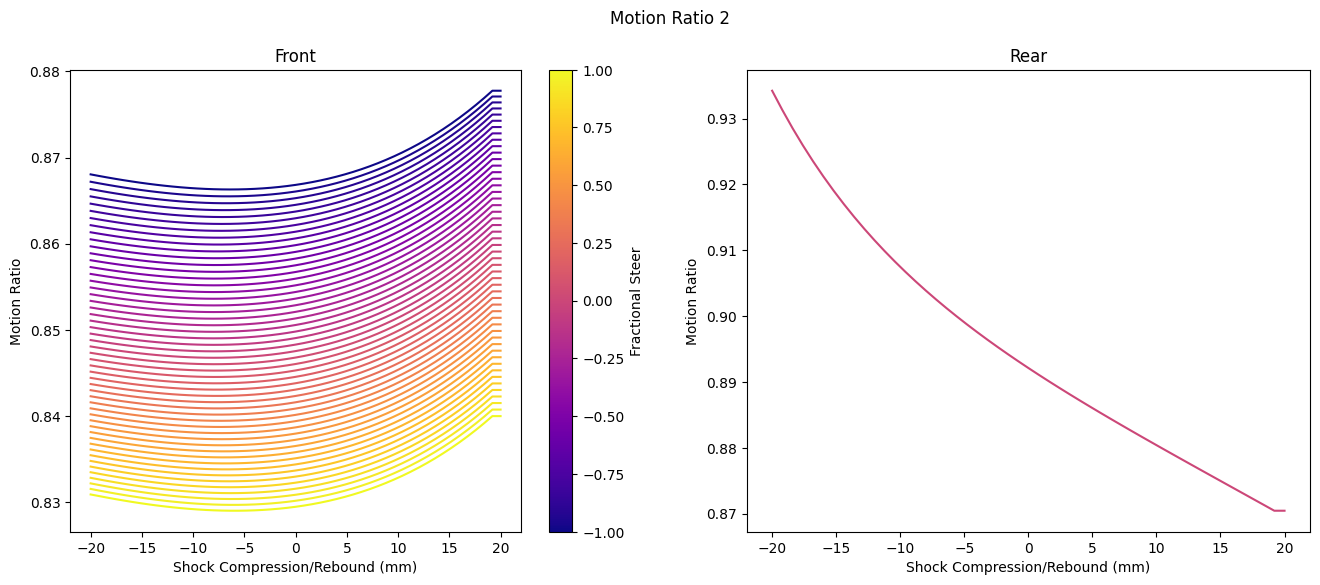

In [3]:
#first graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Motion Ratio 1')
fig.tight_layout()
n = len(f1[0,:,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f1[:,i,0],f1[:,i,2])

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r1[:,0,0],r1[:,0,2],color=colors[n//2])
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer');

#second graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Motion Ratio 2')
fig.tight_layout()
n = len(f2[0,:,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f2[:,i,0],f2[:,i,2])

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r2[:,0,0],r2[:,0,2],color=colors[n//2])
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer');

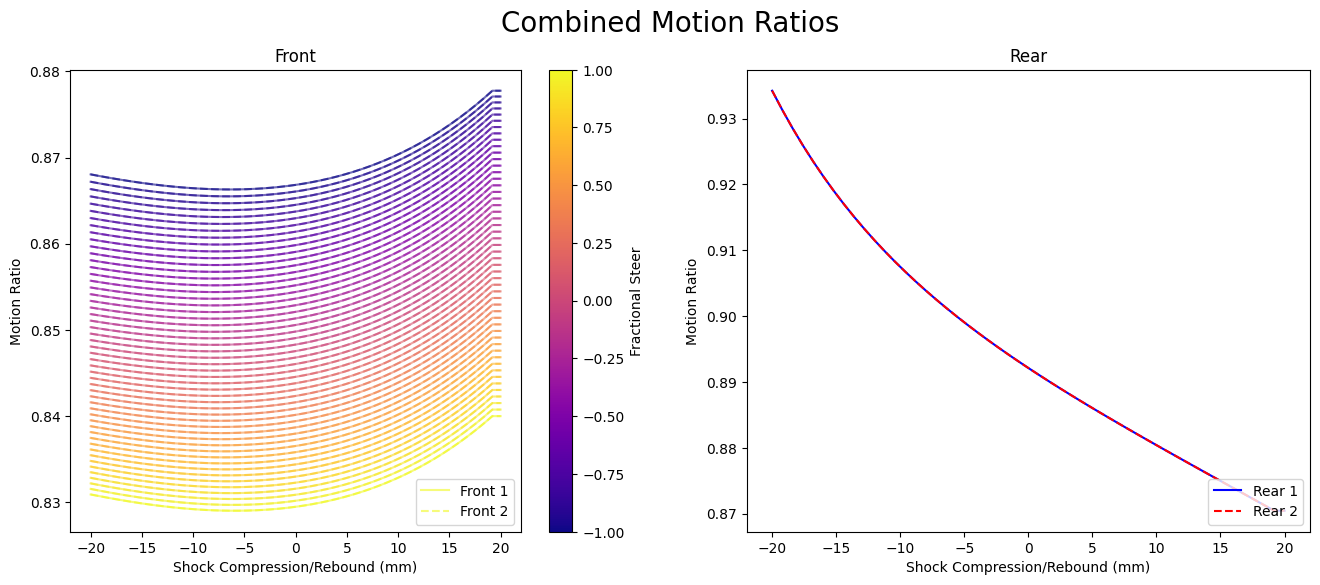

In [4]:
# combined graph

fig = plt.figure(figsize=(16, 6))
fig.suptitle('Combined Motion Ratios', fontsize=20)
fig.tight_layout()

n1 = len(f1[0,:,0])
colormap1 = plt.cm.plasma
colors1 = [colormap1(i) for i in np.linspace(1, 0, n1)]

norm1 = mpl.colors.Normalize(vmin=-1, vmax=1)
scalar_mappable1 = plt.cm.ScalarMappable(cmap=colormap1, norm=norm1)

n2 = len(f2[0,:,0])
colormap2 = plt.cm.plasma
colors2 = [colormap2(i) for i in np.linspace(1, 0, n2)]

ax1 = fig.add_subplot(121)
for i in range(n1):
    ax1.plot(f1[:,i,0], f1[:,i,2], color=colors1[i], alpha=0.6, label='Front 1' if i == 0 else "")
for i in range(n2):
    ax1.plot(f2[:,i,0], f2[:,i,2], color=colors2[i], linestyle='--', alpha=0.6, label='Front 2' if i == 0 else "")

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')
ax1.legend(loc='lower right', fontsize=10, frameon=True)

ax2 = fig.add_subplot(122)
ax2.plot(r1[:,0,0], r1[:,0,2], color='blue', label='Rear 1')
ax2.plot(r2[:,0,0], r2[:,0,2], color='red', linestyle='--', label='Rear 2')

ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')
ax2.legend(loc='lower right', fontsize=10, frameon=True)

cbar = plt.colorbar(scalar_mappable1, ax=ax1, label='Fractional Steer')

plt.show()

### Camber Gain and Bump Steer (Neutral Steer)


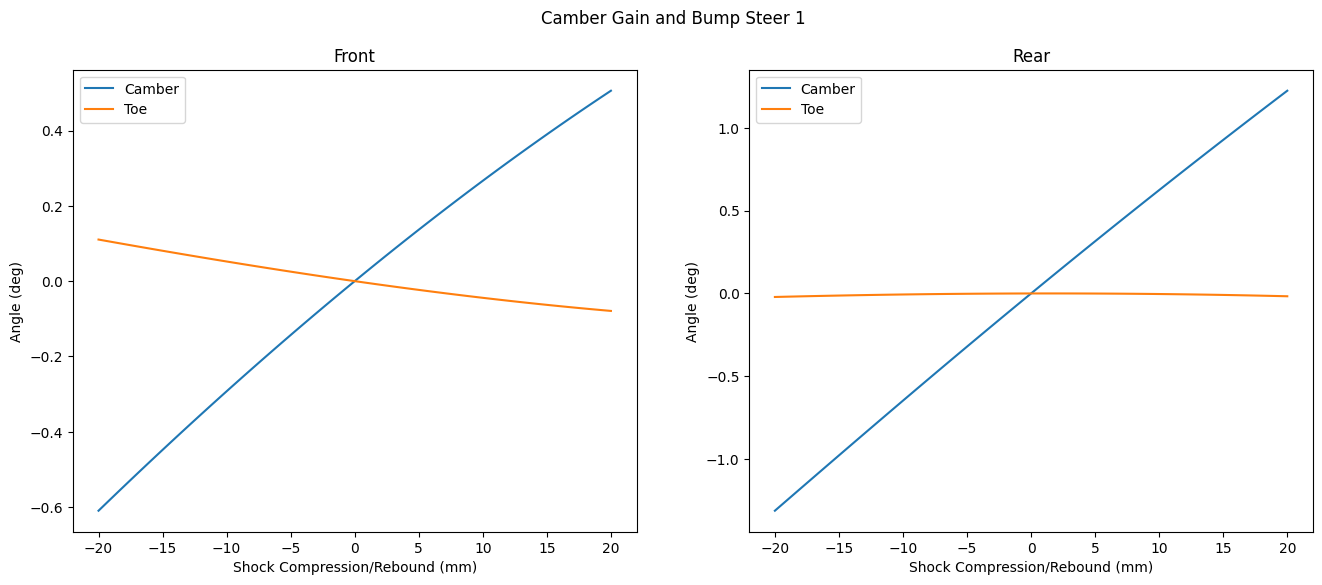

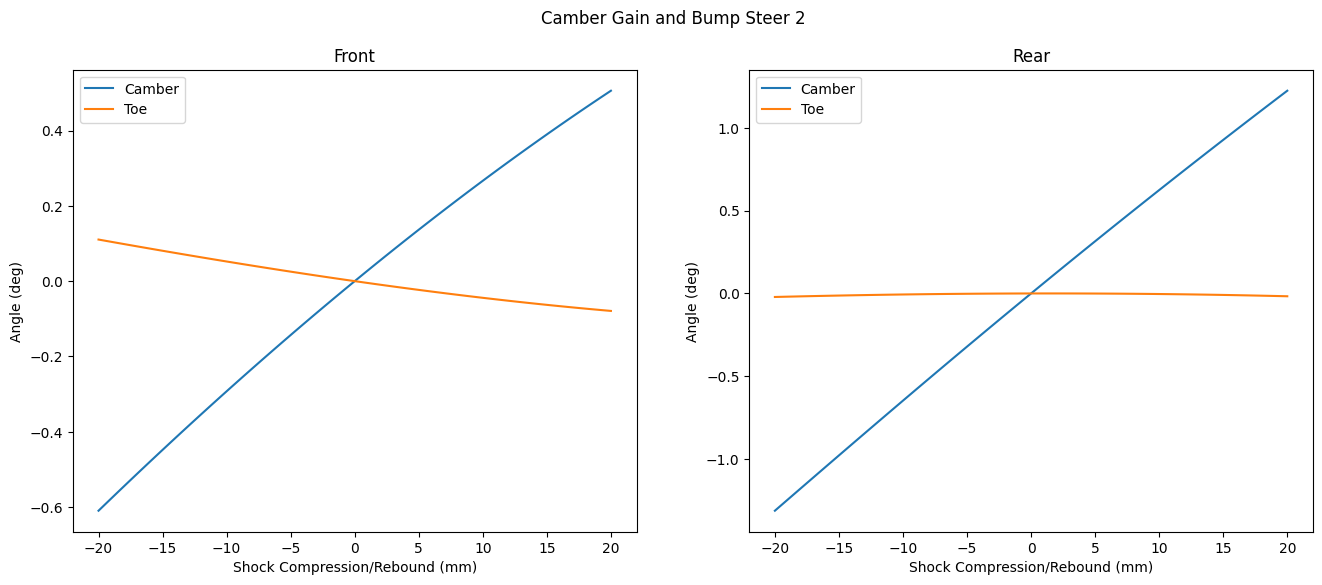

In [5]:
# first graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Camber Gain and Bump Steer 1')
fig.tight_layout()
n = len(f1[0,:,0])
ax1 = fig.add_subplot(121)
ax1.plot(f1[:,n//2,0],np.rad2deg(f1[:,n//2,9]), label = "Camber")
ax1.plot(f1[:,n//2,0],np.rad2deg(f1[:,n//2,10]), label = "Toe")
ax1.legend()
ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r1[:,0,0],np.rad2deg(r1[:,0,9]), label = "Camber")
ax2.plot(r1[:,0,0],np.rad2deg(r1[:,0,10]), label = "Toe")
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.legend()
ax2.set_title('Rear');

# second graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Camber Gain and Bump Steer 2')
fig.tight_layout()
n = len(f2[0,:,0])
ax1 = fig.add_subplot(121)
ax1.plot(f2[:,n//2,0],np.rad2deg(f2[:,n//2,9]), label = "Camber")
ax1.plot(f2[:,n//2,0],np.rad2deg(f2[:,n//2,10]), label = "Toe")
ax1.legend()
ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r2[:,0,0],np.rad2deg(r2[:,0,9]), label = "Camber")
ax2.plot(r2[:,0,0],np.rad2deg(r2[:,0,10]), label = "Toe")
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.legend()
ax2.set_title('Rear');

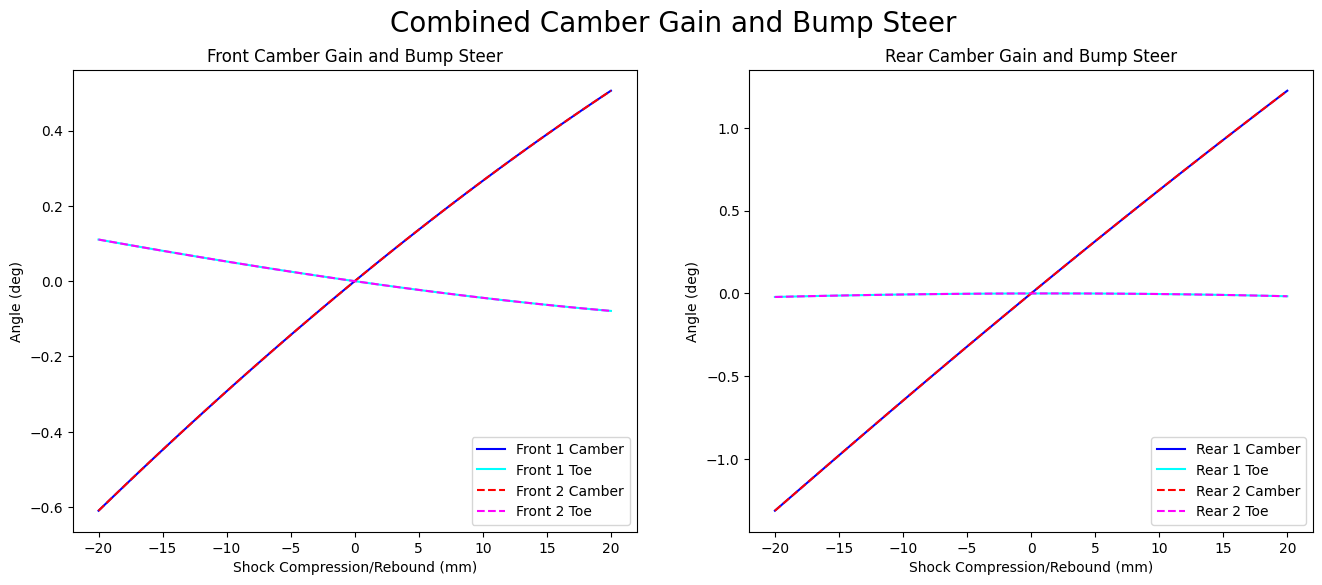

In [6]:
# combined graph

fig = plt.figure(figsize=(16, 6))
fig.suptitle('Combined Camber Gain and Bump Steer', fontsize=20)
fig.tight_layout()

n1 = len(f1[0,:,0])
n2 = len(f2[0,:,0])

ax1 = fig.add_subplot(121)

ax1.plot(f1[:,n1//2,0], np.rad2deg(f1[:,n1//2,9]), label='Front 1 Camber', color='blue')
ax1.plot(f1[:,n1//2,0], np.rad2deg(f1[:,n1//2,10]), label='Front 1 Toe', color='cyan')

ax1.plot(f2[:,n2//2,0], np.rad2deg(f2[:,n2//2,9]), label='Front 2 Camber', color='red', linestyle='--')
ax1.plot(f2[:,n2//2,0], np.rad2deg(f2[:,n2//2,10]), label='Front 2 Toe', color='magenta', linestyle='--')

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front Camber Gain and Bump Steer')
ax1.legend(loc='lower right', fontsize=10, frameon=True)

ax2 = fig.add_subplot(122)

ax2.plot(r1[:,0,0], np.rad2deg(r1[:,0,9]), label='Rear 1 Camber', color='blue')
ax2.plot(r1[:,0,0], np.rad2deg(r1[:,0,10]), label='Rear 1 Toe', color='cyan')

ax2.plot(r2[:,0,0], np.rad2deg(r2[:,0,9]), label='Rear 2 Camber', color='red', linestyle='--')
ax2.plot(r2[:,0,0], np.rad2deg(r2[:,0,10]), label='Rear 2 Toe', color='magenta', linestyle='--')

ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Rear Camber Gain and Bump Steer')
ax2.legend(loc='lower right', fontsize=10, frameon=True)

plt.show()

### Front Camber Gain (Non-Neutral Steer)

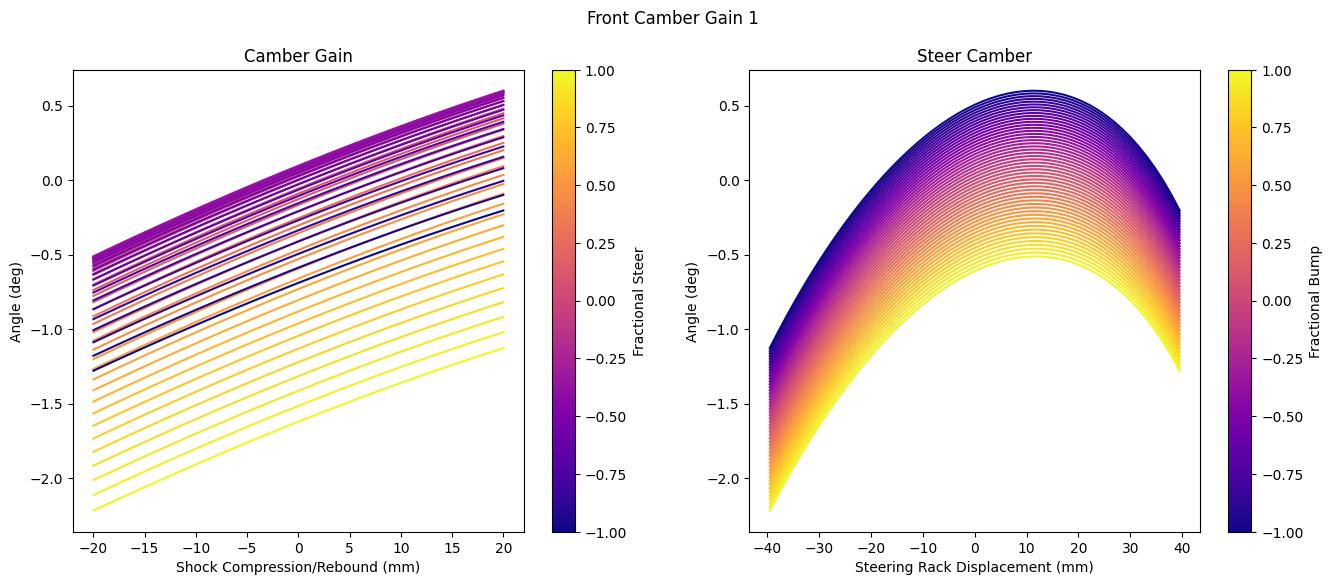

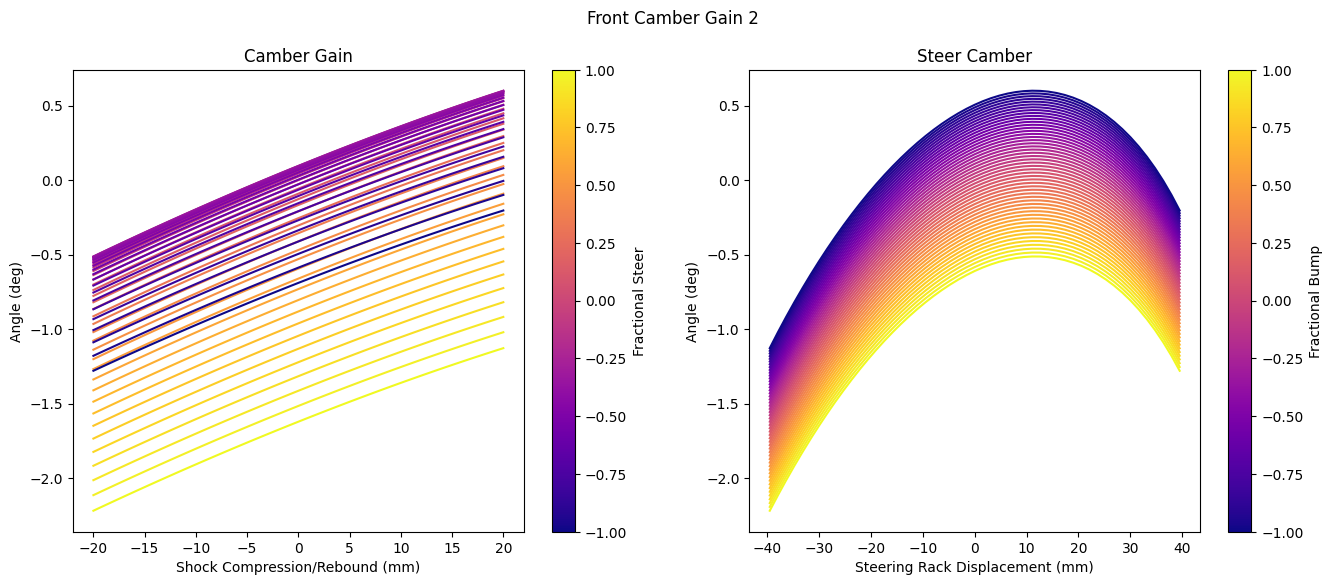

In [7]:
# first graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Front Camber Gain 1')
fig.tight_layout()

n = len(f1[0,:,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f1[:,i,0], np.rad2deg(f1[:,i,9]))

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Camber Gain')

n = len(f1[:,0,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax2 = fig.add_subplot(122)
for i in range(n):
    ax2.plot(f1[i,:,1], np.rad2deg(f1[i,:,9]))

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Steer Camber')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Fractional Bump');

# second graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Front Camber Gain 2')
fig.tight_layout()

n = len(f2[0,:,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f2[:,i,0], np.rad2deg(f2[:,i,9]))

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Camber Gain')

n = len(f2[:,0,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax2 = fig.add_subplot(122)
for i in range(n):
    ax2.plot(f2[i,:,1], np.rad2deg(f2[i,:,9]))

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Steer Camber')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Fractional Bump');

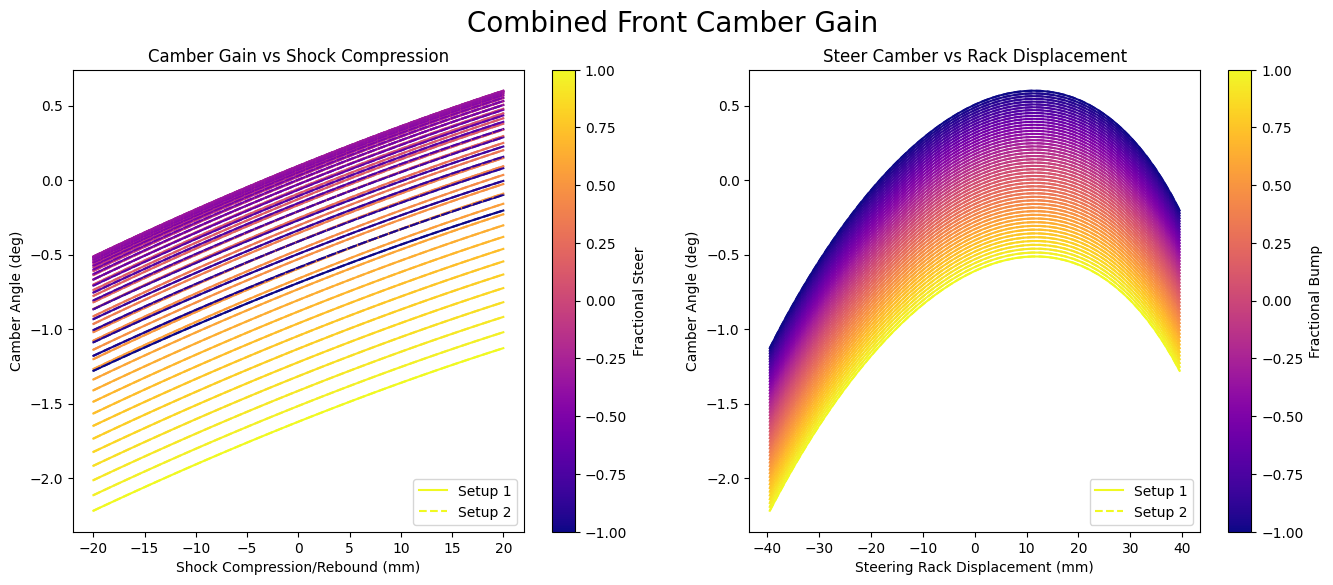

In [8]:
# combined graph

fig = plt.figure(figsize=(16, 6))
fig.suptitle('Combined Front Camber Gain', fontsize=20)
fig.tight_layout()

n1 = len(f1[0,:,0])
n2 = len(f2[0,:,0])

colormap = plt.cm.plasma
colors1 = [colormap(i) for i in np.linspace(1, 0, n1)]
colors2 = [colormap(i) for i in np.linspace(1, 0, n2)]

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=colormap, norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n1):
    ax1.plot(f1[:,i,0], np.rad2deg(f1[:,i,9]), color=colors1[i], label='Setup 1' if i == 0 else None)

for i in range(n2):
    ax1.plot(f2[:,i,0], np.rad2deg(f2[:,i,9]), color=colors2[i], linestyle='--', label='Setup 2' if i == 0 else None)

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Camber Angle (deg)')
ax1.set_title('Camber Gain vs Shock Compression')
ax1.legend(loc='lower right', fontsize=10, frameon=True)

ax2 = fig.add_subplot(122)

n1 = len(f1[:,0,0])
n2 = len(f2[:,0,0])

for i in range(n1):
    ax2.plot(f1[i,:,1], np.rad2deg(f1[i,:,9]), color=colors1[i], label='Setup 1' if i == 0 else None)

for i in range(n2):
    ax2.plot(f2[i,:,1], np.rad2deg(f2[i,:,9]), color=colors2[i], linestyle='--', label='Setup 2' if i == 0 else None)

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Camber Angle (deg)')
ax2.set_title('Steer Camber vs Rack Displacement')
ax2.legend(loc='lower right', fontsize=10, frameon=True)

cbar1 = plt.colorbar(scalar_mappable, ax=ax1, label='Fractional Steer')
cbar2 = plt.colorbar(scalar_mappable, ax=ax2, label='Fractional Bump')

plt.show()

### Steering and Ackermann

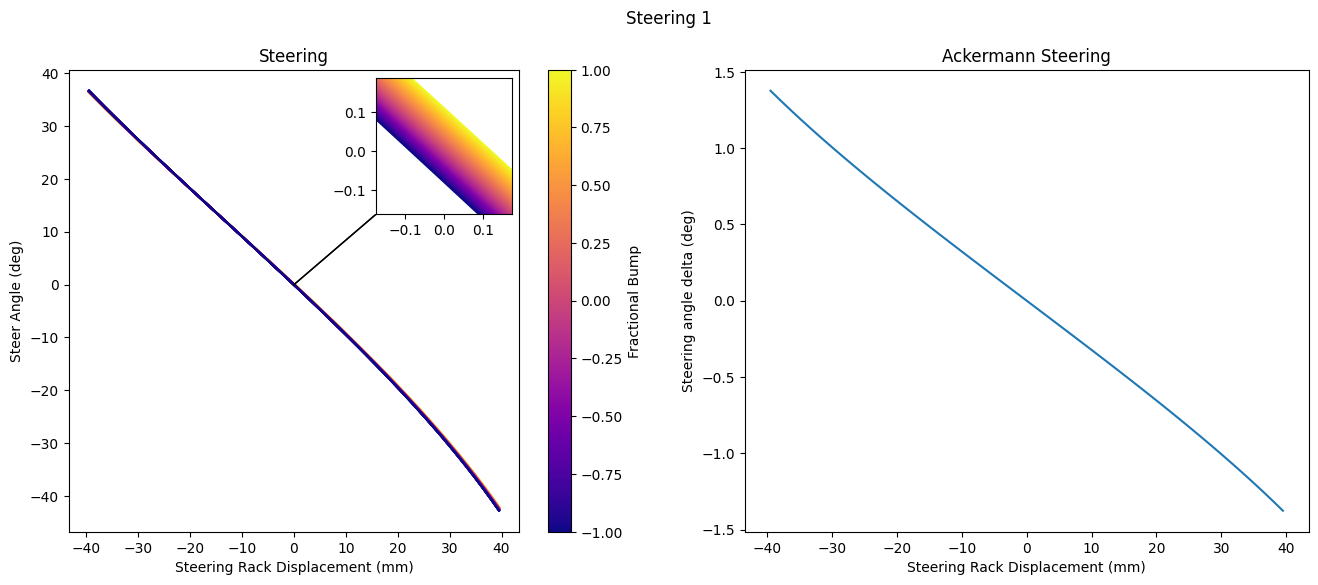

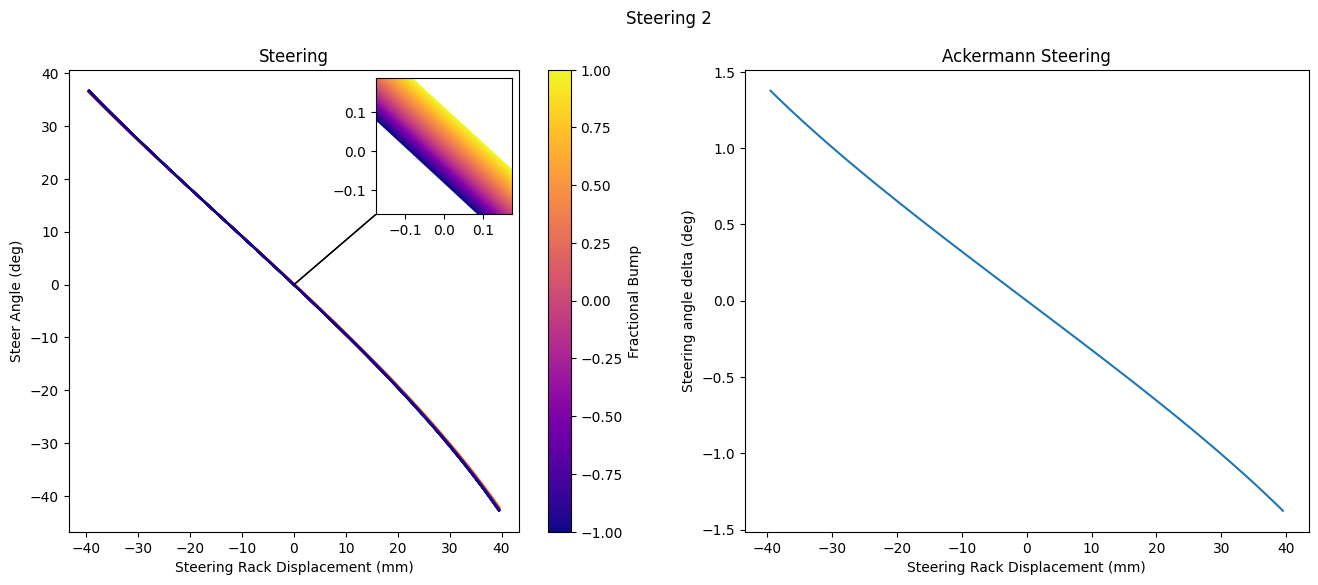

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

# first graph 

fig = plt.figure(figsize=(16,6))
fig.suptitle('Steering 1')
fig.tight_layout()
n = len(f1[:,0,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f1[i,:,1], np.rad2deg(f1[i,:,10]))

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Steering Rack Displacement (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering')

## EDIT ZOOM LEVEL HERE ###
zoom1 = 75
## EDIT ZOOM POINT HERE [-1,1] ###
t= 0

zoom2 = zoom1*3
ax1_1 = zoomed_inset_axes(ax1, zoom=zoom1, loc='upper right')

for i in range(n):
    ax1_1.plot(f1[i,:,1],np.rad2deg(f1[i,:,10]))
for i, line in enumerate(ax1_1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])
ax1_1.set_aspect('equal', adjustable='box')
m = len(f1[0,:,1])
idx = m//2 + int(t*m/2)
x1, y1 = f1[n//2,idx,1], f1[n//2,idx,10]

ax1_1.set_xlim(x1 + f1[n//2,0,1]/zoom2, x1 + f1[n//2,-1,1]/zoom2)
ax1_1.set_ylim(np.rad2deg(y1 - f1[n//2,0,10]/zoom2), np.rad2deg(y1 - f1[n//2,-1,10]/zoom2))
mark_inset(ax1, ax1_1, loc1=3, loc2=3)

colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)
fig.colorbar(scalar_mappable,ax=ax1,label='Fractional Bump')

ackermann = (f1[n//2,:,10] - f1[n//2,::-1,10])
ax2 = fig.add_subplot(122)
ax2.plot(f1[n//2,:,1], ackermann)

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Steering angle delta (deg)')
ax2.set_title('Ackermann Steering');

# second graph 

fig = plt.figure(figsize=(16,6))
fig.suptitle('Steering 2')
fig.tight_layout()
n = len(f2[:,0,0])
colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f2[i,:,1], np.rad2deg(f2[i,:,10]))

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Steering Rack Displacement (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering')

## EDIT ZOOM LEVEL HERE ###
zoom1 = 75
## EDIT ZOOM POINT HERE [-1,1] ###
t= 0

zoom2 = zoom1*3
ax1_1 = zoomed_inset_axes(ax1, zoom=zoom1, loc='upper right')

for i in range(n):
    ax1_1.plot(f2[i,:,1],np.rad2deg(f2[i,:,10]))
for i, line in enumerate(ax1_1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])
ax1_1.set_aspect('equal', adjustable='box')
m = len(f2[0,:,1])
idx = m//2 + int(t*m/2)
x1, y1 = f2[n//2,idx,1], f2[n//2,idx,10]

ax1_1.set_xlim(x1 + f2[n//2,0,1]/zoom2, x1 + f2[n//2,-1,1]/zoom2)
ax1_1.set_ylim(np.rad2deg(y1 - f2[n//2,0,10]/zoom2), np.rad2deg(y1 - f2[n//2,-1,10]/zoom2))
mark_inset(ax1, ax1_1, loc1=3, loc2=3)

colormap = plt.cm.plasma
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.plasma,norm=norm)
fig.colorbar(scalar_mappable,ax=ax1,label='Fractional Bump')

ackermann = (f2[n//2,:,10] - f2[n//2,::-1,10])
ax2 = fig.add_subplot(122)
ax2.plot(f2[n//2,:,1], ackermann)

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Steering angle delta (deg)')
ax2.set_title('Ackermann Steering');

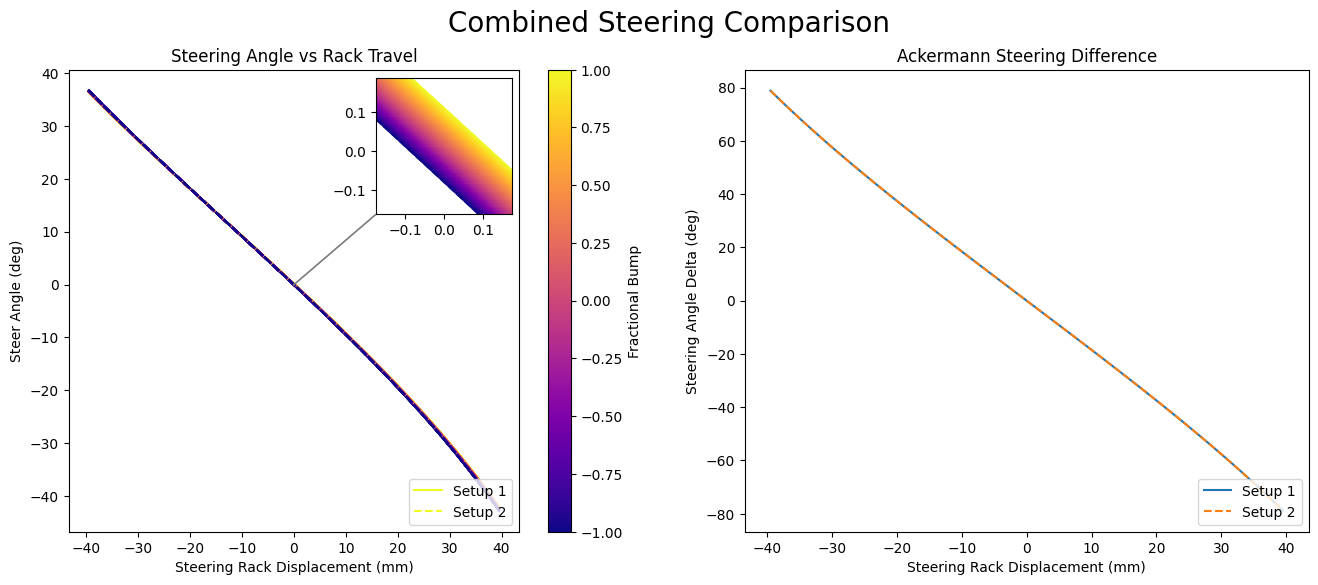

In [10]:
# combined graph

fig = plt.figure(figsize=(16, 6))
fig.suptitle('Combined Steering Comparison', fontsize=20)
fig.tight_layout()

n1 = len(f1[:,0,0])
n2 = len(f2[:,0,0])

colormap = plt.cm.plasma
colors1 = [colormap(i) for i in np.linspace(1, 0, n1)]
colors2 = [colormap(i) for i in np.linspace(1, 0, n2)]

norm = mpl.colors.Normalize(vmin=-1, vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=colormap, norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n1):
    ax1.plot(f1[i,:,1], np.rad2deg(f1[i,:,10]), color=colors1[i], label='Setup 1' if i == 0 else None)

for i in range(n2):
    ax1.plot(f2[i,:,1], np.rad2deg(f2[i,:,10]), color=colors2[i], linestyle='--', label='Setup 2' if i == 0 else None)

ax1.set_xlabel('Steering Rack Displacement (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering Angle vs Rack Travel')
ax1.legend(loc='lower right', fontsize=10, frameon=True)

zoom1 = 75
zoom2 = zoom1 * 3
t = 0  

axins = zoomed_inset_axes(ax1, zoom=zoom1, loc='upper right')  

for i in range(n1):
    axins.plot(f1[i,:,1], np.rad2deg(f1[i,:,10]), color=colors1[i])

for i in range(n2):
    axins.plot(f2[i,:,1], np.rad2deg(f2[i,:,10]), color=colors2[i], linestyle='--')

m = len(f1[0,:,1])
idx = m // 2 + int(t * m / 2)
x1, y1 = f1[n1//2, idx, 1], f1[n1//2, idx, 10]

axins.set_xlim(x1 + f1[n1//2, 0, 1] / zoom2, x1 + f1[n1//2, -1, 1] / zoom2)
axins.set_ylim(np.rad2deg(y1 - f1[n1//2, 0, 10] / zoom2), np.rad2deg(y1 - f1[n1//2, -1, 10] / zoom2))
axins.set_aspect('equal', adjustable='box')

mark_inset(ax1, axins, loc1=3, loc2=3, fc="none", ec="0.5")

ackermann1 = np.rad2deg(f1[n1//2, :, 10] - f1[n1//2, ::-1, 10])
ackermann2 = np.rad2deg(f2[n2//2, :, 10] - f2[n2//2, ::-1, 10])

ax2 = fig.add_subplot(122)
ax2.plot(f1[n1//2, :, 1], ackermann1, label='Setup 1')
ax2.plot(f2[n2//2, :, 1], ackermann2, linestyle='--', label='Setup 2')

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Steering Angle Delta (deg)')
ax2.set_title('Ackermann Steering Difference')
ax2.legend(loc='lower right', fontsize=10, frameon=True)

cbar1 = plt.colorbar(scalar_mappable, ax=ax1, label='Fractional Bump')

plt.show()

### Contact Patch Configuration Spaces

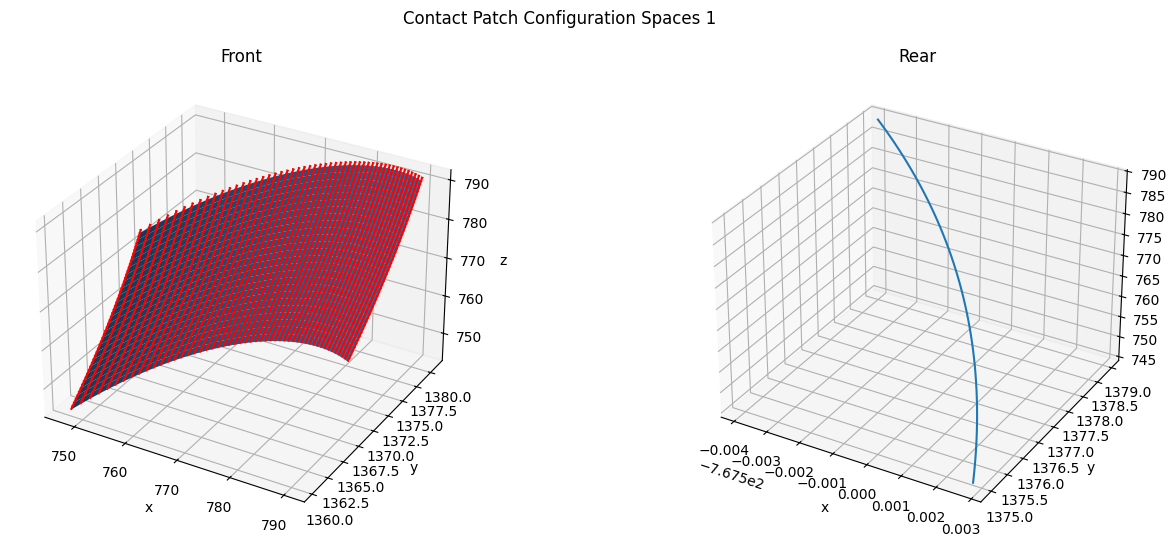

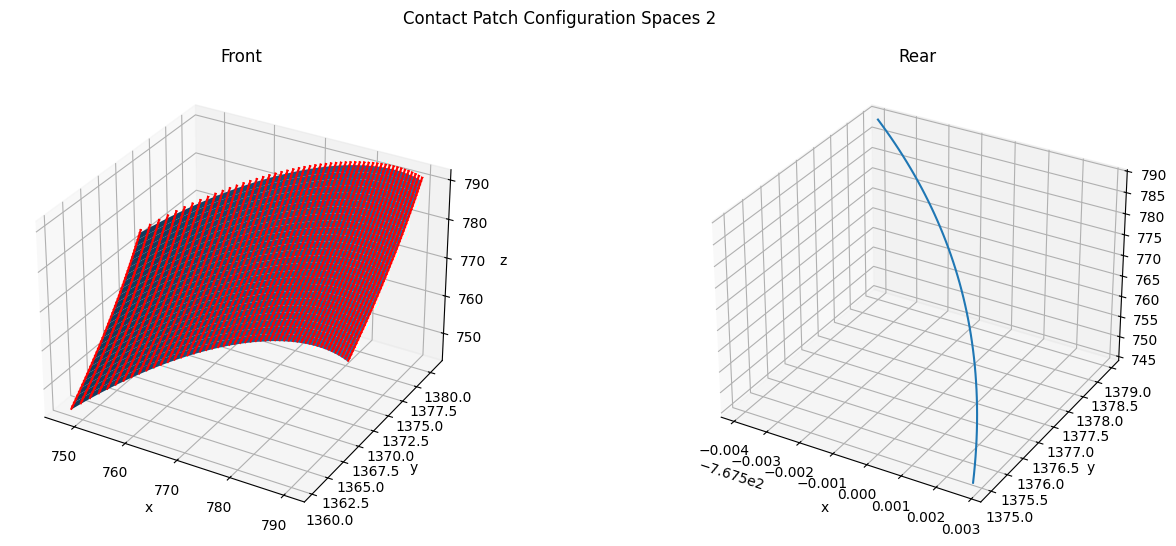

In [11]:
# first graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Contact Patch Configuration Spaces 1')
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f1[:,:,3],f1[:,:,4],f1[:,:,5])
ax1.quiver(f1[:,:,3],f1[:,:,4],f1[:,:,5], f1[:,:,6],f1[:,:,7],f1[:,:,8], length=1, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r1[:,0,3],r1[:,0,4],r1[:,0,5])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear');

# second graph

fig = plt.figure(figsize=(16,6))
fig.suptitle('Contact Patch Configuration Spaces 2')
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f2[:,:,3],f2[:,:,4],f2[:,:,5])
ax1.quiver(f2[:,:,3],f2[:,:,4],f2[:,:,5], f2[:,:,6],f2[:,:,7],f2[:,:,8], length=1, color='r')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r2[:,0,3],r2[:,0,4],r2[:,0,5])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear');

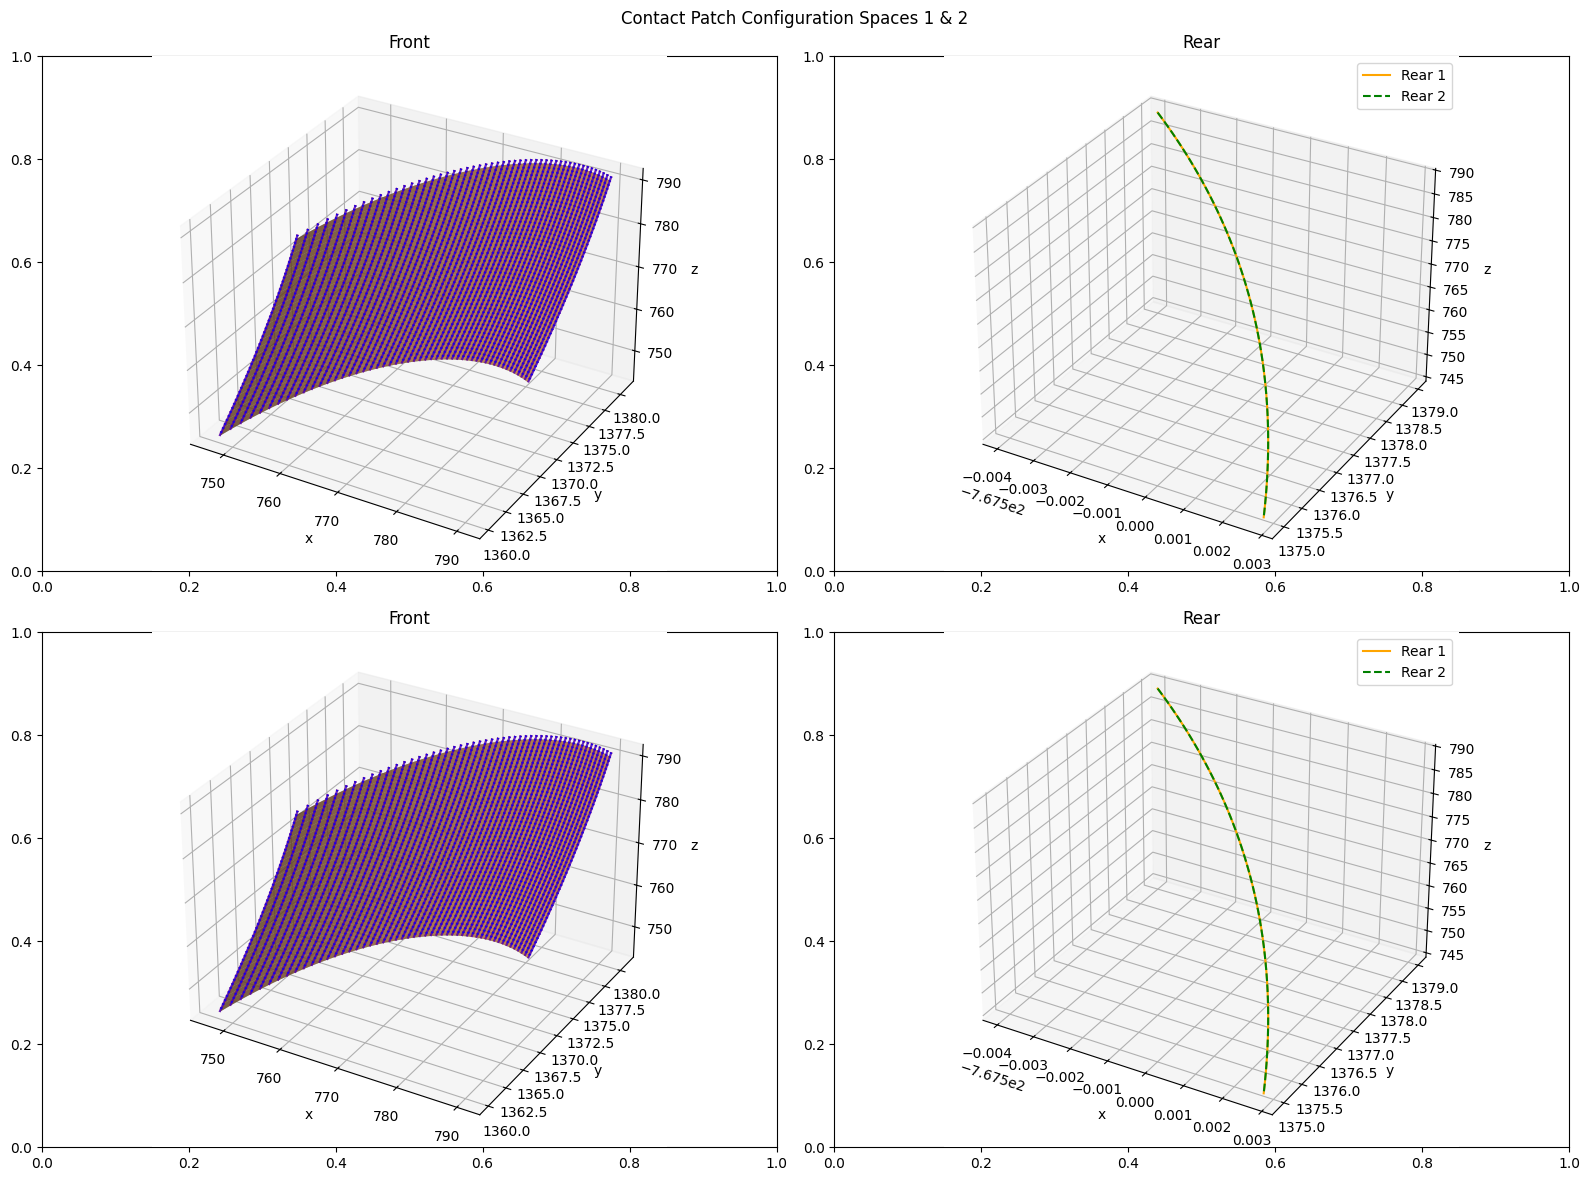

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Combined graph
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# --------- First Graph: Contact Patch Configuration Spaces 1 ---------
fig.suptitle('Contact Patch Configuration Spaces 1 & 2')

# Front plot (f1) and overlapping with f2
ax1 = axs[0, 0]  # First subplot (top-left)
ax1 = fig.add_subplot(221, projection="3d")
ax1.plot_surface(f1[:,:,3], f1[:,:,4], f1[:,:,5], alpha=0.6)  # f1 surface
ax1.quiver(f1[:,:,3], f1[:,:,4], f1[:,:,5], f1[:,:,6], f1[:,:,7], f1[:,:,8], length=1, color='r', alpha=0.6)  # f1 vectors
ax1.plot_surface(f2[:,:,3], f2[:,:,4], f2[:,:,5], alpha=0.6)  # f2 surface, overlapping
ax1.quiver(f2[:,:,3], f2[:,:,4], f2[:,:,5], f2[:,:,6], f2[:,:,7], f2[:,:,8], length=1, color='b', alpha=0.6)  # f2 vectors, overlapping
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

# Rear plot (r1) and overlapping with r2
ax2 = axs[0, 1]  # First subplot (top-right)
ax2 = fig.add_subplot(222, projection="3d")
ax2.plot(r1[:,0,3], r1[:,0,4], r1[:,0,5], label='Rear 1', color='orange')  # r1 plot
ax2.plot(r2[:,0,3], r2[:,0,4], r2[:,0,5], label='Rear 2', color='green', linestyle='--')  # r2 plot, overlapping
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear')
ax2.legend()

# --------- Second Graph: Contact Patch Configuration Spaces 2 ---------
# Front plot (f2)
ax3 = axs[1, 0]  # Second subplot (bottom-left)
ax3 = fig.add_subplot(223, projection="3d")
ax3.plot_surface(f1[:,:,3], f1[:,:,4], f1[:,:,5], alpha=0.6)  # f1 surface
ax3.quiver(f1[:,:,3], f1[:,:,4], f1[:,:,5], f1[:,:,6], f1[:,:,7], f1[:,:,8], length=1, color='r', alpha=0.6)  # f1 vectors
ax3.plot_surface(f2[:,:,3], f2[:,:,4], f2[:,:,5], alpha=0.6)  # f2 surface, overlapping
ax3.quiver(f2[:,:,3], f2[:,:,4], f2[:,:,5], f2[:,:,6], f2[:,:,7], f2[:,:,8], length=1, color='b', alpha=0.6)  # f2 vectors, overlapping
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('Front')

# Rear plot (r2)
ax4 = axs[1, 1]  # Second subplot (bottom-right)
ax4 = fig.add_subplot(224, projection="3d")
ax4.plot(r1[:,0,3], r1[:,0,4], r1[:,0,5], label='Rear 1', color='orange')  # r1 plot
ax4.plot(r2[:,0,3], r2[:,0,4], r2[:,0,5], label='Rear 2', color='green', linestyle='--')  # r2 plot, overlapping
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_title('Rear')
ax4.legend()

plt.tight_layout()
plt.show()
